# Data

In [2]:
import pandas as pd

df = pd.read_csv('AAPL.csv')

In [5]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [10]:
df1 = df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

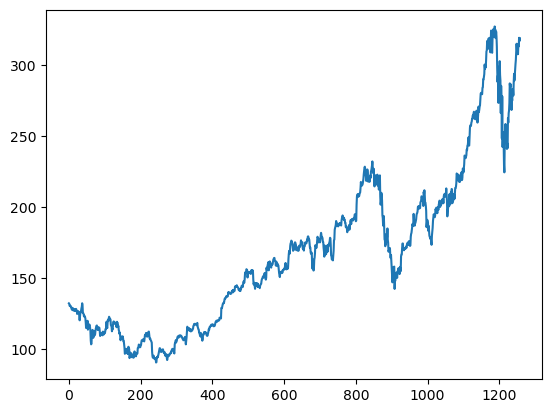

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

# Preprocesing

# Scaler

In [14]:
#LSTM are sensitive to the scale of the data, apply MinMax scaler

import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


# Train Test

In [20]:
train_size = int(len(df1)*0.7)
test_size = len(df1) - train_size

train_data, test_data = df1[0:train_size, :], df1[train_size:len(df1),:]

In [32]:
def create_dataset(dataset, time_step=1):
    data_X, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, 0,1,2,3-----99,100
        data_X.append(a)
        data_y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_y)

In [33]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [34]:
print(X_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [39]:
model = Sequential([
    Input(shape=(100, 1)),  # Input layer specifying the shape
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - loss: 0.0398 - val_loss: 0.0637
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 0.0051 - val_loss: 0.0059
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 9.7006e-04 - val_loss: 0.0046
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 7.4092e-04 - val_loss: 0.0045
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 6.7482e-04 - val_loss: 0.0050
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 7.4496e-04 - val_loss: 0.0058
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 6.9300e-04 - val_loss: 0.0051
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 6.2622e-04 - val_loss: 0.0048
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 6.2077e-04 - val_loss: 0.0055
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 6.4780e-04 - val_loss: 0.0067
Epoch 12

# Prediction and Error

In [43]:
import tensorflow as tf

In [45]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [46]:
y_train_predict=scaler.inverse_transform(y_train_predict)
y_test_predict=scaler.inverse_transform(y_test_predict)

In [50]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,y_train_predict)))
print(math.sqrt(mean_squared_error(y_test,y_test_predict)))

148.34741758716189
243.56502778960092


# Plot

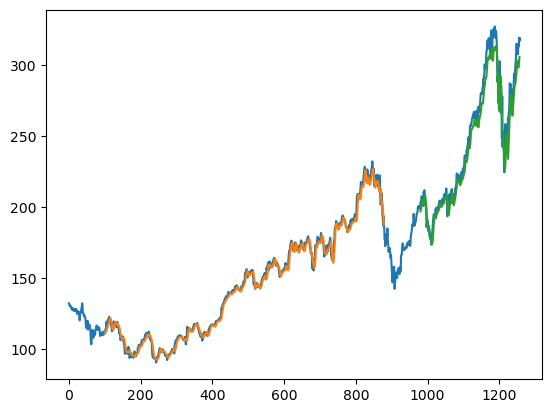

In [51]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_train_predict)+look_back, :] = y_train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(y_train_predict)+(look_back*2)+1:len(df1)-1, :] = y_test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

378

In [58]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.6356919699400492,
 0.6526640209406402,
 0.637802921557038,
 0.7267162036646122,
 0.7138816178333194,
 0.7419150553069325,
 0.7500211095161702,
 0.7722283205268936,
 0.8304905851557884,
 0.8194291986827664,
 0.8289706999915563,
 0.8125474964113824,
 0.7877649244279323,
 0.7516254327450818,
 0.7842607447437306,
 0.7797433082833742,
 0.8132652199611587,
 0.8141096006079542,
 0.7947310647639958,
 0.8333614793548934,
 0.8589884319851391,
 0.8390188296884238,
 0.8562864139153934,
 0.8748627881448958,
 0.887824031073208,
 0.9009541501308793,
 0.9279321117959978,
 0.9485349995778098,
 0.9333361479354896,
 0.9174617917757326,
 0.925441188887951,
 0.9177151059697712,
 0.9483239044161109,
 0.9406400405302711,
 0.9663514312251966,
 0.9563033015283293,
 0.964915984125644]

# Prediction for next 10 days

In [60]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        y_hat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(y_hat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        y_hat = model.predict(x_input, verbose=0)
        print(y_hat[0])
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_hat.tolist())
        i=i+1
    
print(lst_output)

[0.92403483]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
len(df1)

1258

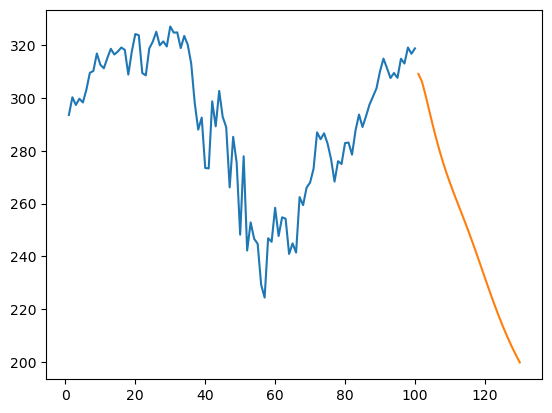

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

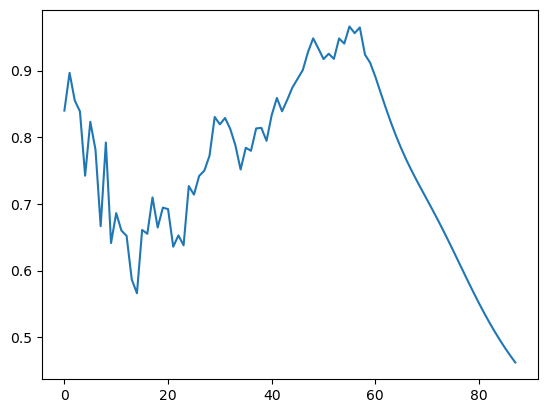

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

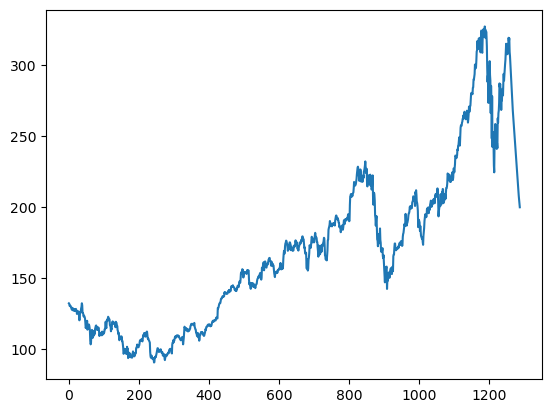

In [65]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)